In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
#LOAD THE GENERAL DATA SET
PFdata= pd.read_csv(r"C:\Users\manth\Downloads\archive\PS_20174392719_1491204439457_log.csv", header=0) 
#Copy the data file
PFdata_bk=PFdata.copy()
#display the first five records
PFdata.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
#display the information
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#changing the data type
PFdata["amount"] = PFdata["amount"].astype(int)
PFdata["oldbalanceOrg"] = PFdata["oldbalanceOrg"].astype(int)
PFdata["newbalanceOrig"] = PFdata["newbalanceOrig"].astype(int)
PFdata["oldbalanceDest"] = PFdata["oldbalanceDest"].astype(int)
PFdata["newbalanceDest"] = PFdata["newbalanceDest"].astype(int)

#DISPLAY THE CLAIMS DATA
PFdata

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839  C1231006815         170136          160296   
1           1   PAYMENT     1864  C1666544295          21249           19384   
2           1  TRANSFER      181  C1305486145            181               0   
3           1  CASH_OUT      181   C840083671            181               0   
4           1   PAYMENT    11668  C2048537720          41554           29885   
...       ...       ...      ...          ...            ...             ...   
6362615   743  CASH_OUT   339682   C786484425         339682               0   
6362616   743  TRANSFER  6311409  C1529008245        6311409               0   
6362617   743  CASH_OUT  6311409  C1162922333        6311409               0   
6362618   743  TRANSFER   850002  C1685995037         850002               0   
6362619   743  CASH_OUT   850002  C1280323807         850002               0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0        M1979787155               0               0        0               0  
1        M2044282225               0               0        0               0  
2         C553264065               0               0        1               0  
3          C38997010           21182               0        1               0  
4        M1230701703               0               0        0               0  
...              ...             ...             ...      ...             ...  
6362615   C776919290               0          339682        1               0  
6362616  C1881841831               0               0        1               0  
6362617  C1365125890           68488         6379898        1               0  
6362618  C2080388513               0               0        1               0  
6362619   C873221189         6510099         7360101        1               0  

[6362620 rows x 11 columns]

In [6]:
#display the information
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   step            int64 
 1   type            object
 2   amount          int32 
 3   nameOrig        object
 4   oldbalanceOrg   int32 
 5   newbalanceOrig  int32 
 6   nameDest        object
 7   oldbalanceDest  int32 
 8   newbalanceDest  int32 
 9   isFraud         int64 
 10  isFlaggedFraud  int64 
dtypes: int32(5), int64(3), object(3)
memory usage: 412.6+ MB


In [6]:
#display the duplicates
PFdata_dup=PFdata[PFdata.duplicated(keep='last')]
PFdata_dup

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []

In [7]:
#display the null values
PFdata.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#counts the values
PFdata['nameOrig'].value_counts()
PFdata['nameDest'].value_counts()
PFdata['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
#use LabelEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
PFdata['nameOrig']=LE.fit_transform(PFdata['nameOrig'])
PFdata['nameDest']=LE.fit_transform(PFdata['nameDest'])
PFdata['type']=LE.fit_transform(PFdata['type'])

In [10]:
#display the unique values
PFdata.nunique()

step                  743
type                    5
amount             762236
nameOrig          6353307
oldbalanceOrg     1230252
newbalanceOrig    1285928
nameDest          2722362
oldbalanceDest    2131268
newbalanceDest    2115592
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [11]:
#display the information
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype
---  ------          -----
 0   step            int64
 1   type            int32
 2   amount          int32
 3   nameOrig        int32
 4   oldbalanceOrg   int32
 5   newbalanceOrig  int32
 6   nameDest        int32
 7   oldbalanceDest  int32
 8   newbalanceDest  int32
 9   isFraud         int64
 10  isFlaggedFraud  int64
dtypes: int32(8), int64(3)
memory usage: 339.8 MB


In [15]:
PFdata.shape

(6362620, 11)

In [16]:
# Seperate as 2 dataset based on the target variable class

Q1 = psql.sqldf("select * from PFdata where isFraud = 1 ")
Q2 = psql.sqldf("select * from PFdata where isFraud = 0 ")

In [31]:
# Random sample the data as 20% from "Major Class"

Q3 = Q2.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=0.01))

In [32]:
# Combine the 'minor class' and 20% of 'major class' data as new file 

PFdataN = Q1.append(Q3, ignore_index=True)

# Display the shape of the file

PFdataN.shape

(71757, 11)

In [13]:
cols = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']

In [33]:
#identify the independent and target(dependent) variables
indepvar = []
for col in PFdataN.columns:
    if col != 'isFraud':
        indepvar.append(col)
        
targetvar = 'isFraud'

x= PFdataN[indepvar]
y= PFdataN[targetvar]

In [34]:
#spitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
#diplay the shape of train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50229, 10), (21528, 10), (50229,), (21528,))

In [35]:
#scaling the features  by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# logistic regression

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Confusion matrix : 
 [[  945  1484]
 [  217 18882]]
Outcome values : 
 945 1484 217 18882
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.39      0.53      2429
           0       0.93      0.99      0.96     19099

    accuracy                           0.92     21528
   macro avg       0.87      0.69      0.74     21528
weighted avg       0.91      0.92      0.91     21528

Accuracy : 92.1 %
Precision : 81.3 %
Recall : 38.9 %
F1 Score : 0.526
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 68.9 %
MCC : 0.529
roc_auc_score: 0.689


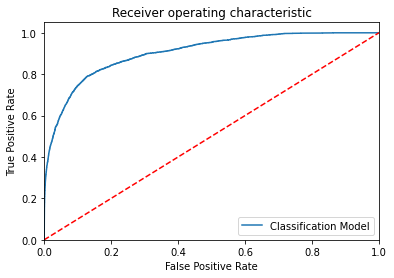

-----------------------------------------------------------------------------------------------------


In [36]:
#to boild 'logistic regression' model with random sampling
 
     
#Train the algorithm and build the model with train dataset


from sklearn.linear_model import LogisticRegression


#create an object for regression model

ModelLR =LogisticRegression()

#ModelLLR=LogisticRegression(penalty='l2',dual=false,tol=0.0001,c=0.1,fit_intercept=true, intercept_scaling=1,
#                           class_weight=none, random_state=none, solver='ldfgs', max_tire=200, multi_class='auto',
#                           verbose=0 ,warm_start=false, n_jobs=none, l1_ratio=none )




#train the model with training dataset

ModelLR.fit(x_train,y_train)

#predict the model with test database

y_pred=ModelLR.predict(x_test)
y_pred_prob=ModelLR.predict_proba(x_test)






#to display the algorithm parameters
params=ModelLR.get_params()
print(params)



# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)



# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)




# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [37]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
43604     9  TRANSFER  153639.43   C473083454           0.00            0.00   
9447      7   PAYMENT    8095.81   C507268114      275894.14       267798.33   
11383     7   CASH_IN   48022.66  C1288983035       11123.04        59145.70   
45513     9   CASH_IN   37104.80  C1002322082       23312.00        60416.80   
17786     8   PAYMENT    5035.81  C1458840297       45273.00        40237.19   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
43604  C1080993648       723384.75       877024.18        0               0   
9447   M2056140241            0.00            0.00        0               0   
11383   C722999505        30015.00            0.00        0               0   
45513    C82311106       302748.85       265644.05        0               0   
17786  M1993608846            0.00            0.00        0               0   

       isFraud_A  isFraud_P  
43604          0          0  
9447           0          0  
11383          0          0  
45513          0          0  
17786          0          0

# decision tree

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Confusion matrix : 
 [[ 1399  1030]
 [   17 19082]]
Outcome values : 
 1399 1030 17 19082
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.58      0.73      2429
           0       0.95      1.00      0.97     19099

    accuracy                           0.95     21528
   macro avg       0.97      0.79      0.85     21528
weighted avg       0.95      0.95      0.95     21528

Accuracy : 95.1 %
Precision : 98.8 %
Recall : 57.6 %
F1 Score : 0.728
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 78.8 %
MCC : 0.734
roc_auc_score: 0.788


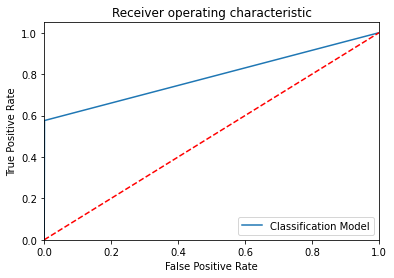

-----------------------------------------------------------------------------------------------------


In [38]:
#to build 'decision tree' model with random sampling
 
   
   
   
     
#Train the algorithm and build the model with train dataset


from sklearn.tree import DecisionTreeClassifier


#create an object for regression model

ModelDT =DecisionTreeClassifier()

#ModelLLR=LogisticRegression(penalty='l2',dual=false,tol=0.0001,c=0.1,fit_intercept=true, intercept_scaling=1,
#                           class_weight=none, random_state=none, solver='ldfgs', max_tire=200, multi_class='auto',
#                           verbose=0 ,warm_start=false, n_jobs=none, l1_ratio=none )




#train the model with training dataset

ModelDT.fit(x_train,y_train)

#predict the model with test database

y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)









#to display the algorithm parameters
params=ModelDT.get_params()
print(params)








# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)







# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);


# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(abs(mx)), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)







# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [39]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
8973      7   PAYMENT   21374.64   C742359535       54404.00        33029.36   
38386     9   PAYMENT    7270.53   C504295673           0.00            0.00   
43824     9   PAYMENT    1143.32   C624860440       30170.00        29026.68   
28801     8   PAYMENT   22551.64  C1266815881       22446.45            0.00   
19468     8  CASH_OUT  247878.57   C548477907           0.00            0.00   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
8973    M926946280            0.00            0.00        0               0   
38386   M929953553            0.00            0.00        0               0   
43824  M1756503956            0.00            0.00        0               0   
28801  M1202703325            0.00            0.00        0               0   
19468  C1023714065      2347360.87      8398562.84        0               0   

       isFraud_A  isFraud_P  
8973           0          0  
38386          0          0  
43824          0          0  
28801          0          0  
19468          0          0

In [40]:
del ResultsFinal['isFraud_A']
ResultsFinal.head()

step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
4      1  PAYMENT  11668.14  C2048537720       41554.00        29885.86   
6      1  PAYMENT   7107.77   C154988899      183195.00       176087.23   
7      1  PAYMENT   7861.64  C1912850431      176087.23       168225.59   
32     1  PAYMENT   5885.56   C840514538           0.00            0.00   
33     1  PAYMENT   5307.88  C1768242710           0.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
4   M1230701703             0.0             0.0        0               0   
6    M408069119             0.0             0.0        0               0   
7    M633326333             0.0             0.0        0               0   
32  M1804441305             0.0             0.0        0               0   
33  M1971783162             0.0             0.0        0               0   

    isFraud_P  
4           1  
6           0  
7           1  
32          1  
33          0

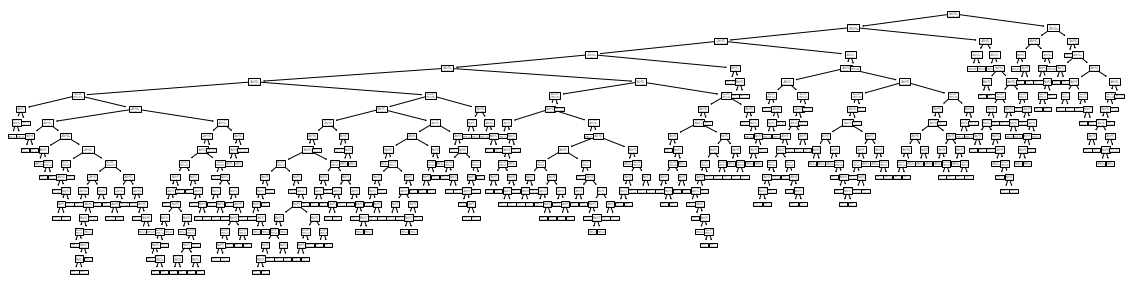

In [41]:
#plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);

# random forest algorithm

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix : 
 [[ 1947   482]
 [    7 19092]]
Outcome values : 
 1947 482 7 19092
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.80      0.89      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.90      0.94     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 97.7 %
Precision : 99.6 %
Recall : 80.2 %
F1 Score : 0.888
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 90.1 %
MCC : 0.882
roc_auc_score

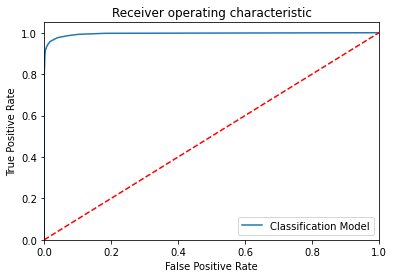

-----------------------------------------------------------------------------------------------------


In [42]:
#to build 'random forest tree' model with random sampling
 
   
   
   
     
#Train the algorithm and build the model with train dataset


from sklearn.ensemble import RandomForestClassifier


#create an object for regression model

ModelRF =RandomForestClassifier()

#ModelLLR=LogisticRegression(penalty='l2',dual=false,tol=0.0001,c=0.1,fit_intercept=true, intercept_scaling=1,
#                           class_weight=none, random_state=none, solver='ldfgs', max_tire=200, multi_class='auto',
#                           verbose=0 ,warm_start=false, n_jobs=none, l1_ratio=none )
#train the model with training dataset

ModelRF.fit(x_train,y_train)

#predict the model with test database

y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)










#to display the algorithm parameters
params=ModelRF.get_params()
print(params)








# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)










# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);








# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) /sqrt(abs(mx)), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)








# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [43]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
57131     9  CASH_OUT    90719.82  C1109086918           0.00             0.0   
9670      7  TRANSFER   492198.86  C1072154748       70032.00             0.0   
19614     8   CASH_IN    46086.74  C1435798016     3060548.46       3106635.2   
36064     9  TRANSFER  1130321.87  C1403439495         109.00             0.0   
5194      5   PAYMENT     8182.90  C2102534528       29705.00         21522.1   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
57131  C1793056361       280641.00       574184.96        0               0   
9670    C811597470        27725.43       428593.84        0               0   
19614  C2112142735       210500.97        39612.46        0               0   
36064   C984805074       100968.00      1470724.67        0               0   
5194    M267400033            0.00            0.00        0               0   

       isFraud_A  isFraud_P  
57131          0          0  
9670           0          0  
19614          0          0  
36064          0          0  
5194           1          1

# Extra tree algorithm

Confusion matrix : 
 [[ 1985   444]
 [   10 19089]]
Outcome values : 
 1985 444 10 19089
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.82      0.90      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.91      0.94     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 97.9 %
Precision : 99.5 %
Recall : 81.7 %
F1 Score : 0.897
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 90.8 %
MCC : 0.891
roc_auc_score: 0.908


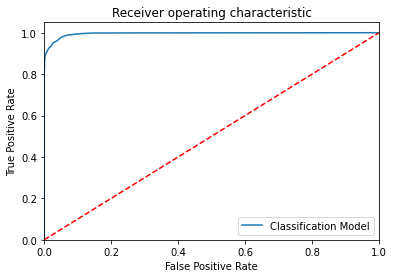

-----------------------------------------------------------------------------------------------------


In [44]:
# To build the 'Extra Trees' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for Extra Trees Classifier

ModelET = ExtraTreesClassifier()

# Train the model with train data

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual, predicted, labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(abs(mx)), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')


In [45]:
PFdata.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [46]:
figcols=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']


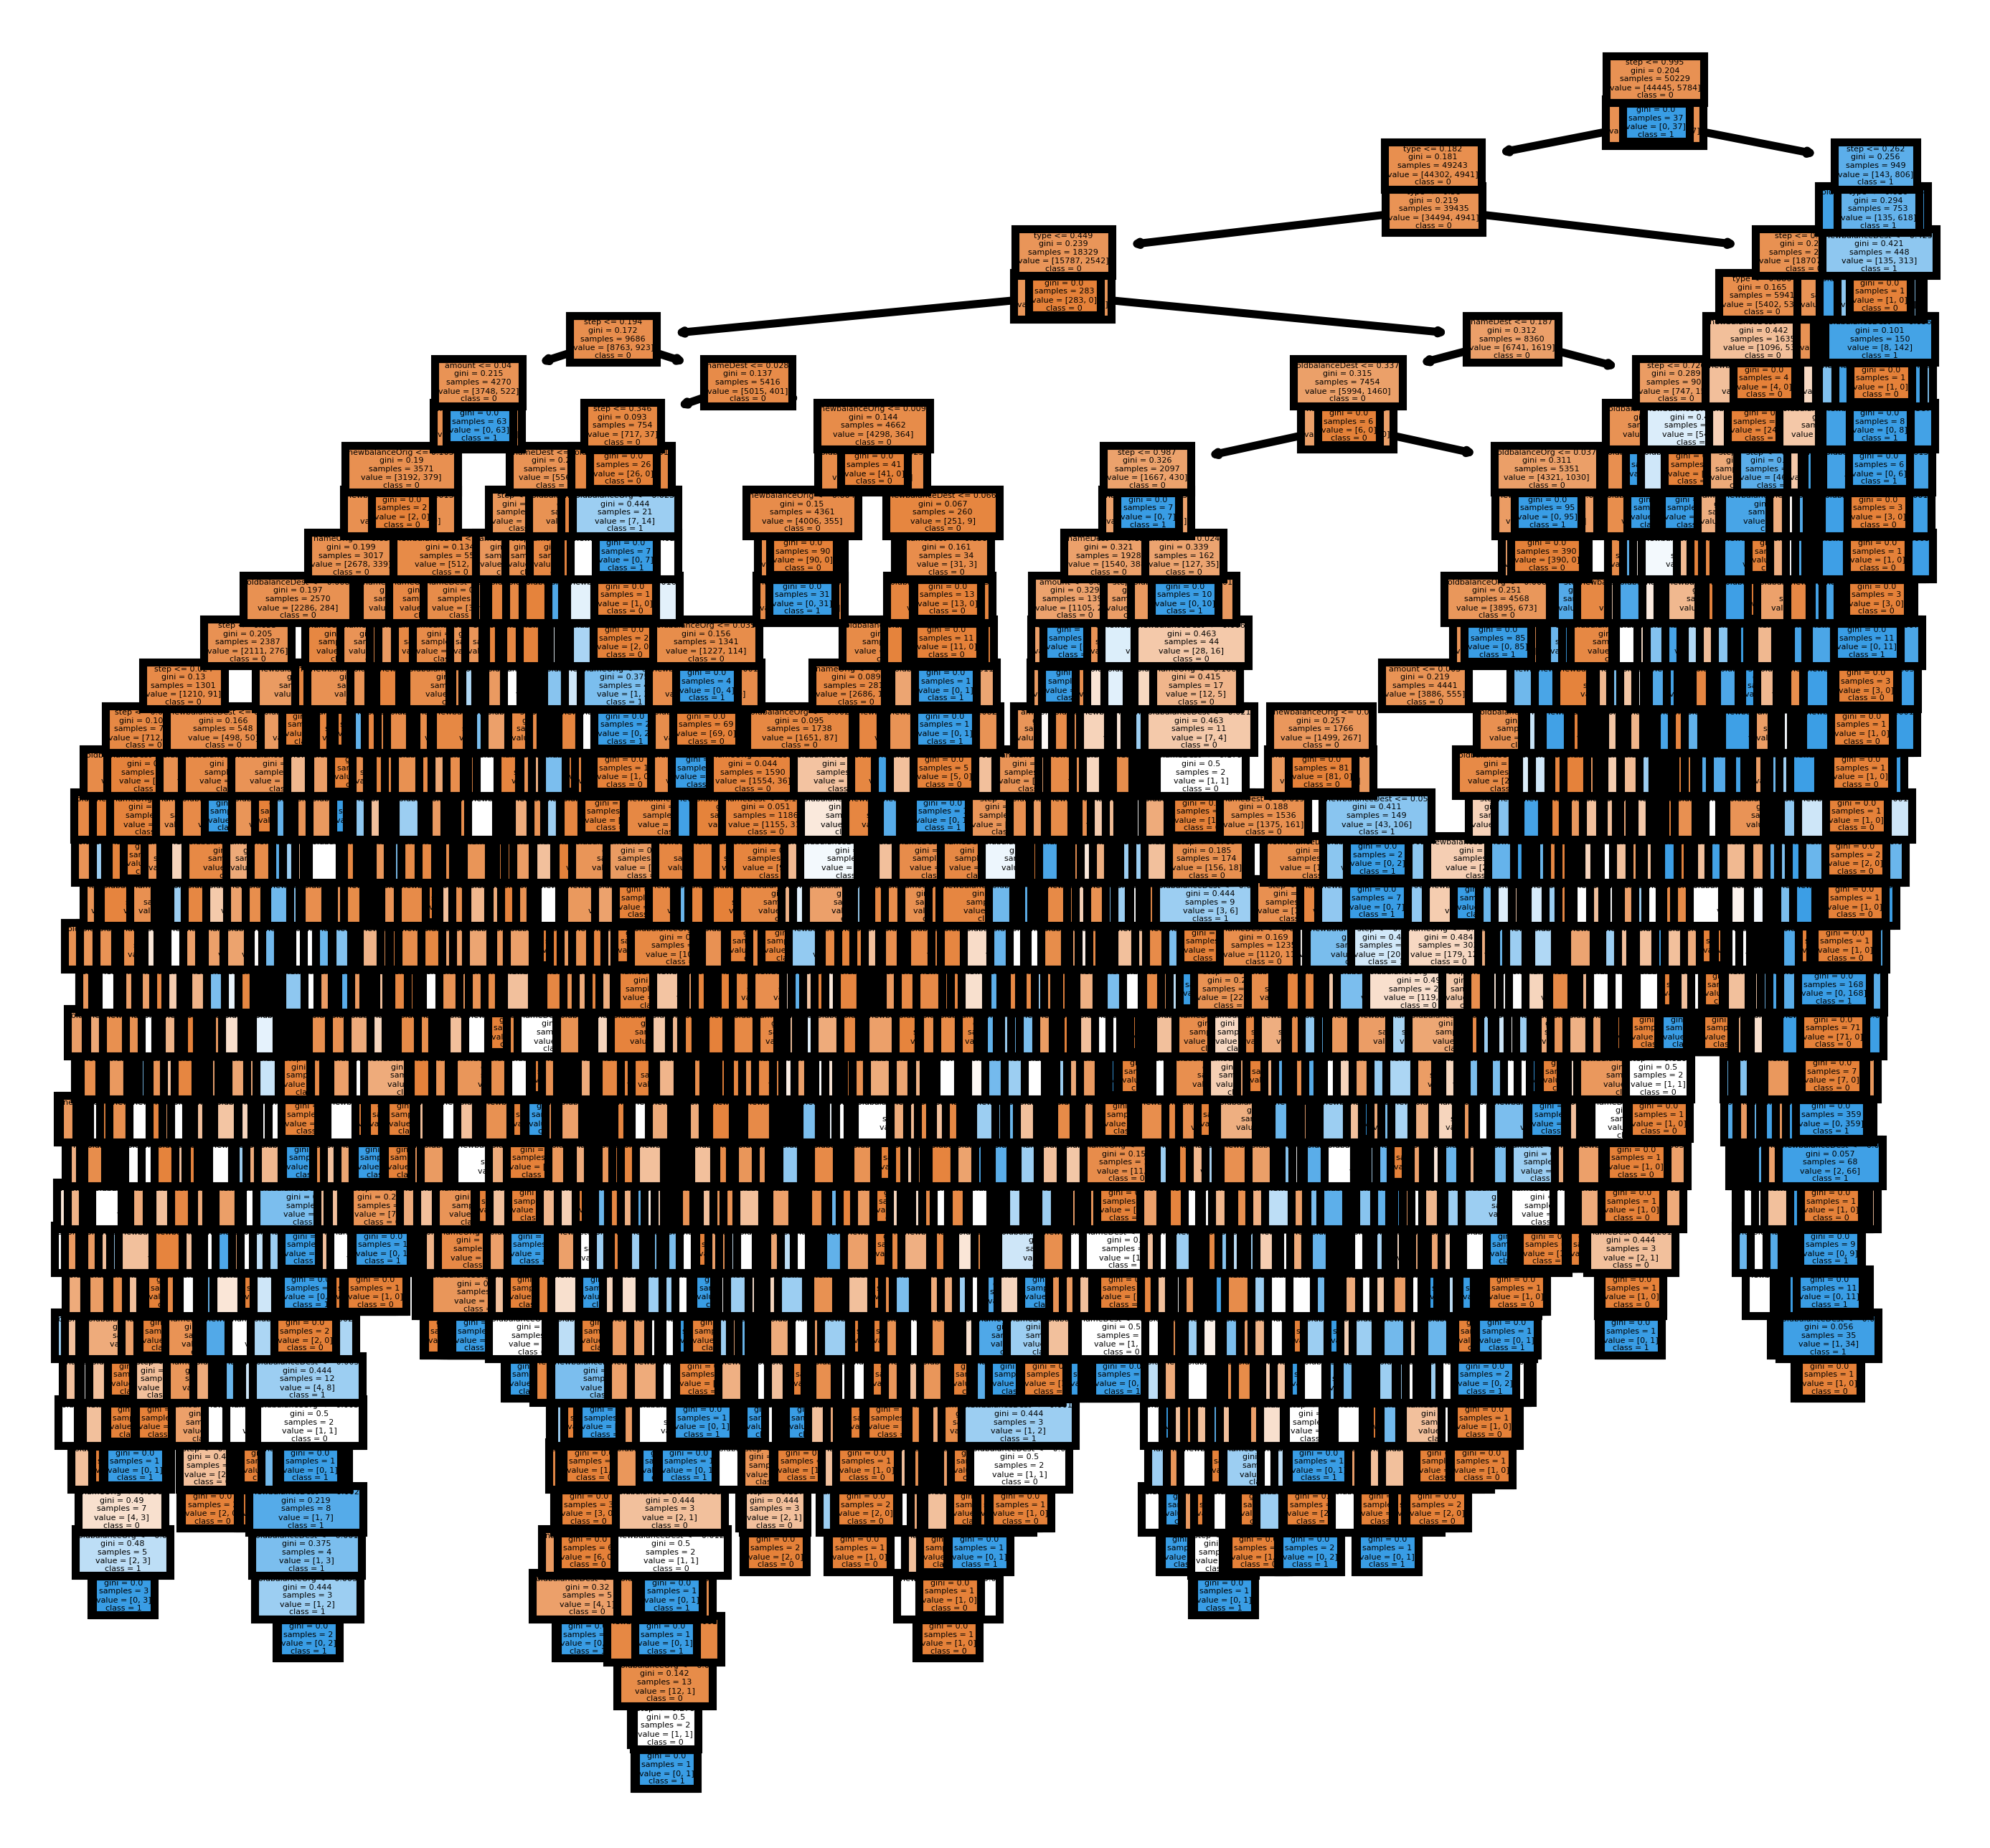

In [47]:
# Visualize individual trees and code below visualizes the first decision tree of Extra Trees Classifier

from sklearn import tree

fn1=figcols
cn1=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(ModelET.estimators_[0],
               feature_names = fn1,
               class_names=cn1,
               filled = True);
#fig.savefig('ModelET.png')


In [48]:
# Visualize individual trees and code below visualizes the first 5 decision trees of Extra Trees Classifier

from sklearn import tree

fn2=figcols
cn2=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(ModelET.estimators_[0],
                   feature_names = fn2,
                   class_names=cn2,
                   filled = True,
                   ax = axes[index]);
   
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('ModelET1.png')

# KNN Algorithm

In [49]:
KNN_Results=pd.read_csv(r"C:\Users\manth\Downloads\KNNResults.csv",header=0)
KNN_Results.head()


Empty DataFrame
Columns: [Model Name, KNN K Value, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1475   954]
 [  703 18396]]
Outcome values : 
 1475 954 703 18396
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.61      0.64      2429
           0       0.95      0.96      0.96     19099

    accuracy                           0.92     21528
   macro avg       0.81      0.79      0.80     21528
weighted avg       0.92      0.92      0.92     21528

Accuracy : 92.3 %
Precision : 67.7 %
Recall : 60.7 %
F1 Score : 0.64
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 78.5 %
MCC : 0.598
roc_auc_score: 0.785


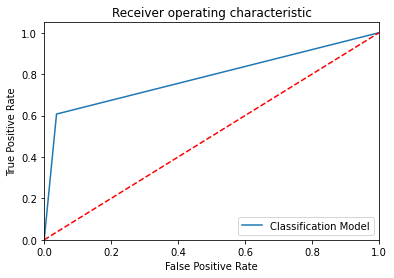

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1120  1309]
 [  188 18911]]
Outcome values : 
 1120 1309 188 18911
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.46      0.60      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.90      0.73      0.78     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.0 %
Precision : 85.6 %
Recall : 46.1 %
F1 Score : 0.599
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 72.6 %
MCC : 0.598
roc_auc_score: 0.726


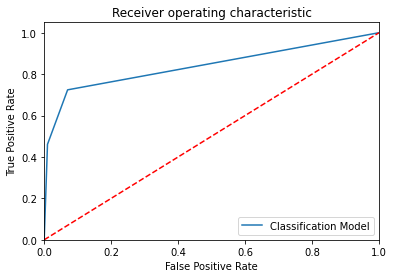

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1420  1009]
 [  430 18669]]
Outcome values : 
 1420 1009 430 18669
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.58      0.66      2429
           0       0.95      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.86      0.78      0.81     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.3 %
Precision : 76.8 %
Recall : 58.5 %
F1 Score : 0.664
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 78.1 %
MCC : 0.635
roc_auc_score: 0.781


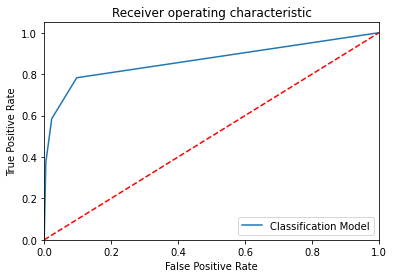

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1200  1229]
 [  215 18884]]
Outcome values : 
 1200 1229 215 18884
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.49      0.62      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.3 %
Precision : 84.8 %
Recall : 49.4 %
F1 Score : 0.624
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 74.2 %
MCC : 0.616
roc_auc_score: 0.741


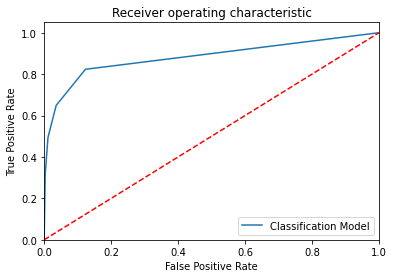

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1371  1058]
 [  368 18731]]
Outcome values : 
 1371 1058 368 18731
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.56      0.66      2429
           0       0.95      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.77      0.81     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.4 %
Precision : 78.8 %
Recall : 56.4 %
F1 Score : 0.658
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 77.2 %
MCC : 0.633
roc_auc_score: 0.773


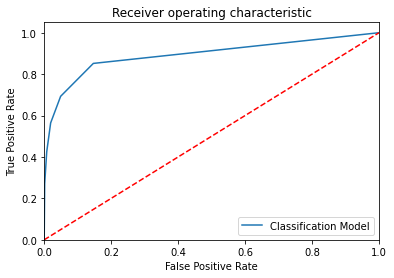

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1204  1225]
 [  237 18862]]
Outcome values : 
 1204 1225 237 18862
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.50      0.62      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.2 %
Precision : 83.6 %
Recall : 49.6 %
F1 Score : 0.622
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 74.2 %
MCC : 0.612
roc_auc_score: 0.742


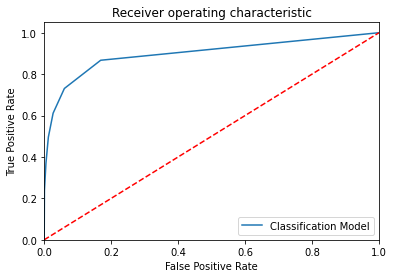

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1343  1086]
 [  343 18756]]
Outcome values : 
 1343 1086 343 18756
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.55      0.65      2429
           0       0.95      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.77      0.81     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.4 %
Precision : 79.7 %
Recall : 55.3 %
F1 Score : 0.653
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 76.8 %
MCC : 0.63
roc_auc_score: 0.767


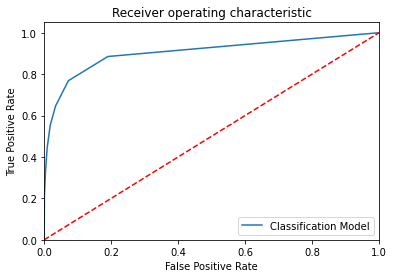

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1198  1231]
 [  234 18865]]
Outcome values : 
 1198 1231 234 18865
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.49      0.62      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.2 %
Precision : 83.7 %
Recall : 49.3 %
F1 Score : 0.621
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 74.0 %
MCC : 0.611
roc_auc_score: 0.74


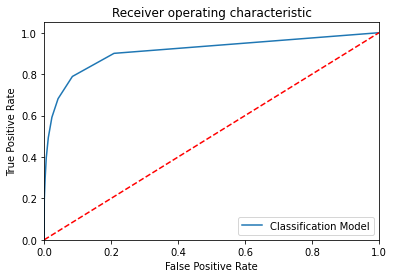

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1287  1142]
 [  316 18783]]
Outcome values : 
 1287 1142 316 18783
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.53      0.64      2429
           0       0.94      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.76      0.80     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.2 %
Precision : 80.3 %
Recall : 53.0 %
F1 Score : 0.638
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 75.6 %
MCC : 0.619
roc_auc_score: 0.757


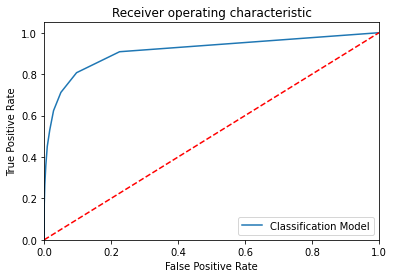

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1182  1247]
 [  238 18861]]
Outcome values : 
 1182 1247 238 18861
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.49      0.61      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.1 %
Precision : 83.2 %
Recall : 48.7 %
F1 Score : 0.614
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 73.8 %
MCC : 0.604
roc_auc_score: 0.737


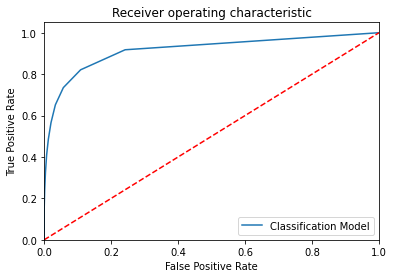

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1276  1153]
 [  306 18793]]
Outcome values : 
 1276 1153 306 18793
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.53      0.64      2429
           0       0.94      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.75      0.80     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.2 %
Precision : 80.7 %
Recall : 52.5 %
F1 Score : 0.636
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 75.4 %
MCC : 0.618
roc_auc_score: 0.755


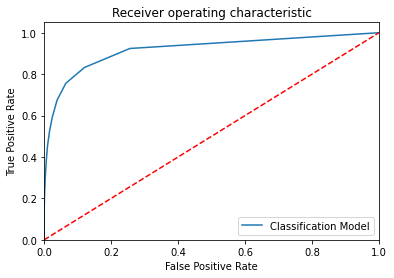

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1186  1243]
 [  237 18862]]
Outcome values : 
 1186 1243 237 18862
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.49      0.62      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.1 %
Precision : 83.3 %
Recall : 48.8 %
F1 Score : 0.616
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 73.8 %
MCC : 0.606
roc_auc_score: 0.738


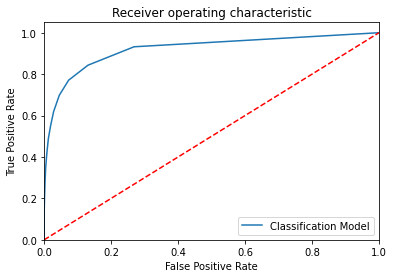

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1260  1169]
 [  298 18801]]
Outcome values : 
 1260 1169 298 18801
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.52      0.63      2429
           0       0.94      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.88      0.75      0.80     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.2 %
Precision : 80.9 %
Recall : 51.9 %
F1 Score : 0.632
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 75.2 %
MCC : 0.614
roc_auc_score: 0.752


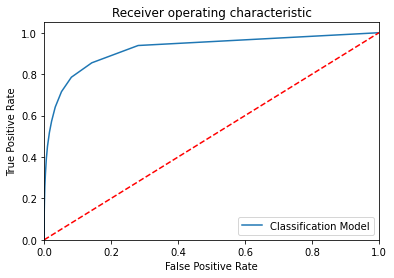

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1183  1246]
 [  240 18859]]
Outcome values : 
 1183 1246 240 18859
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.49      0.61      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.88      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.1 %
Precision : 83.1 %
Recall : 48.7 %
F1 Score : 0.614
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 73.7 %
MCC : 0.604
roc_auc_score: 0.737


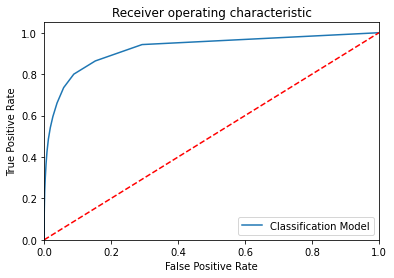

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1241  1188]
 [  277 18822]]
Outcome values : 
 1241 1188 277 18822
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.51      0.63      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.88      0.75      0.80     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.2 %
Precision : 81.8 %
Recall : 51.1 %
F1 Score : 0.629
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 74.8 %
MCC : 0.613
roc_auc_score: 0.748


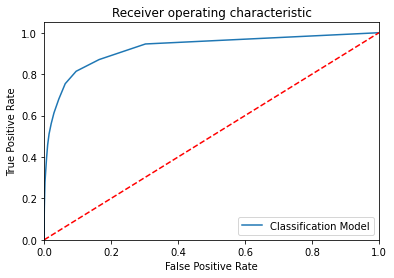

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1176  1253]
 [  233 18866]]
Outcome values : 
 1176 1253 233 18866
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.48      0.61      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.89      0.74      0.79     21528
weighted avg       0.93      0.93      0.92     21528

Accuracy : 93.1 %
Precision : 83.5 %
Recall : 48.4 %
F1 Score : 0.613
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 73.6 %
MCC : 0.604
roc_auc_score: 0.736


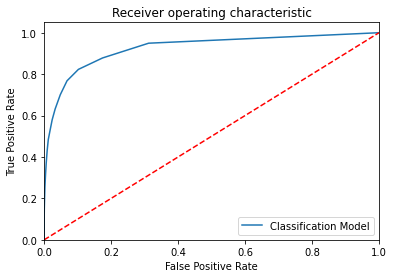

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1217  1212]
 [  285 18814]]
Outcome values : 
 1217 1212 285 18814
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.50      0.62      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.74      0.79     21528
weighted avg       0.92      0.93      0.92     21528

Accuracy : 93.0 %
Precision : 81.0 %
Recall : 50.1 %
F1 Score : 0.619
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 74.3 %
MCC : 0.604
roc_auc_score: 0.743


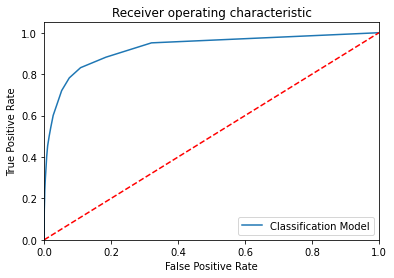

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1152  1277]
 [  251 18848]]
Outcome values : 
 1152 1277 251 18848
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.47      0.60      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.88      0.73      0.78     21528
weighted avg       0.92      0.93      0.92     21528

Accuracy : 92.9 %
Precision : 82.1 %
Recall : 47.4 %
F1 Score : 0.601
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 73.0 %
MCC : 0.591
roc_auc_score: 0.731


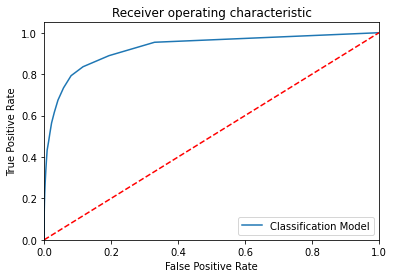

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1198  1231]
 [  287 18812]]
Outcome values : 
 1198 1231 287 18812
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.49      0.61      2429
           0       0.94      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.74      0.79     21528
weighted avg       0.92      0.93      0.92     21528

Accuracy : 92.9 %
Precision : 80.7 %
Recall : 49.3 %
F1 Score : 0.612
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 73.9 %
MCC : 0.597
roc_auc_score: 0.739


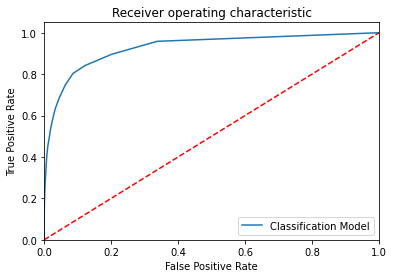

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1143  1286]
 [  240 18859]]
Outcome values : 
 1143 1286 240 18859
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.47      0.60      2429
           0       0.94      0.99      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.88      0.73      0.78     21528
weighted avg       0.92      0.93      0.92     21528

Accuracy : 92.9 %
Precision : 82.6 %
Recall : 47.1 %
F1 Score : 0.6
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 72.9 %
MCC : 0.591
roc_auc_score: 0.729


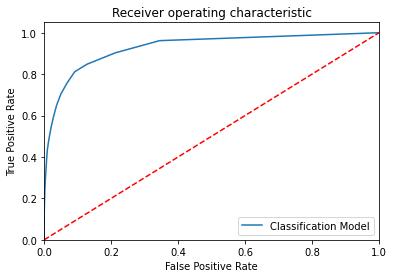

In [50]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
   
    k = a
   
    # Build the model
   
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
   
    # Train the model
   
    ModelKNN.fit(x_train, y_train)
   
    # Predict the model
   
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
   
    print('KNN_K_value = ', a)
   
    # Print the model name
   
    print('Model Name: ', ModelKNN)
   
    # confusion matrix in sklearn
   
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
   
    # actual values
   
    actual = y_test
   
    # predicted values
   
    predicted = y_pred
   
    # confusion matrix
   
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
   
    # outcome values order in sklearn
   
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
   
    # classification report for precision, recall f1-score and accuracy
   
    C_Report = classification_report(actual,predicted,labels=[1,0])
   
    print('Classification report : \n', C_Report)
   
    # calculating the metrics
   
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
   
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
   
    from math import sqrt
   
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
   
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
   
    # Area under ROC curve
   
    from sklearn.metrics import roc_curve, roc_auc_score
   
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

In [51]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
40714     9   PAYMENT     757.96  C1473280485        55604.0        54846.04   
60419     9   CASH_IN   92427.69  C1217012258       107521.0       199948.69   
62234     9   PAYMENT   15197.75   C863617166            0.0            0.00   
46709     9  CASH_OUT  634009.40  C1382026778        11543.0            0.00   
66990     9   PAYMENT    3488.15   C449193361            0.0            0.00   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
40714  M1286271967             0.0            0.00        0               0   
60419   C570428611        206929.0        23706.52        0               0   
62234   M309288524             0.0            0.00        0               0   
46709   C885249077         10710.0      1535312.83        0               0   
66990   M396272652             0.0            0.00        0               0   

       isFraud_A  isFraud_P  
40714          0          0  
60419          0          0  
62234          0          0  
46709          0          0  
66990          0          0

# SVM Algorithm

In [52]:
#load the results dataset
EMResults1=pd.read_csv(r"C:\Users\manth\Downloads\EMResults.csv",header=0)
EMResults1.head()

Empty DataFrame
Columns: [Model Name, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 1922   507]
 [ 1324 17775]]
Outcome values : 
 1922 507 1324 17775
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.79      0.68      2429
           0       0.97      0.93      0.95     19099

    accuracy                           0.91     21528
   macro avg       0.78      0.86      0.81     21528
weighted avg       0.93      0.91      0.92     21528

Accuracy : 91.5 %
Precision : 59.2 %
Recall : 79.1 %
F1 Score : 0.677
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 86.1 %
MCC : 0.638
roc_auc_score: 0.861


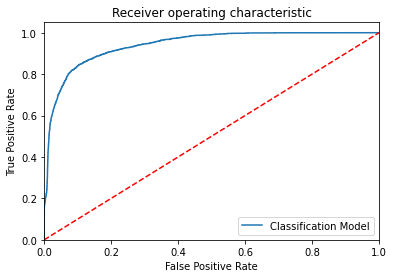

-----------------------------------------------------------------------------------------------------


In [53]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
   
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [54]:
#display the final results

EMResults1.head()


Model Name True_Positive False_Negative False_Positive True_Negative  \
0  SVM - Gaussian          1922            507           1324         17775   

  Accuracy Precision Recall F1 Score Specificity    MCC ROC_AUC_Score  \
0    0.915     0.592  0.791    0.677       0.931  0.638      0.860975   

  Balanced Accuracy  
0             0.861

In [55]:
#load the dataset
EMResults=pd.read_csv(r"C:\Users\manth\Downloads\EMResults2.csv", header=0)
EMResults.head()

Empty DataFrame
Columns: [Model Name, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

# comparing the classifications

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  945  1484]
 [  217 18882]]
Outcome values : 
 945 1484 217 18882
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.39      0.53      2429
           0       0.93      0.99      0.96     19099

    accuracy                           0.92     21528
   macro avg       0.87      0.69      0.74     21528
weighted avg       0.91      0.92      0.91     21528

Accuracy : 92.1 %
Precision : 81.3 %
Recall : 38.9 %
F1 Score : 0.526
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 68.9 %
MCC : 0.529
roc_auc_score: 0.689


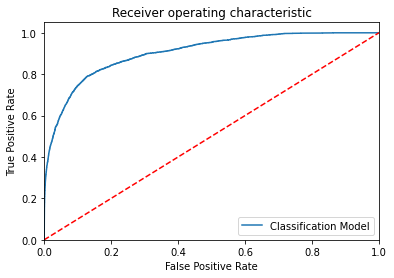

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1389  1040]
 [   22 19077]]
Outcome values : 
 1389 1040 22 19077
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.57      0.72      2429
           0       0.95      1.00      0.97     19099

    accuracy                           0.95     21528
   macro avg       0.97      0.79      0.85     21528
weighted avg       0.95      0.95      0.94     21528

Accuracy : 95.1 %
Precision : 98.4 %
Recall : 57.2 %
F1 Score : 0.723
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 78.6 %
MCC : 0.73
roc_auc_score: 0.785


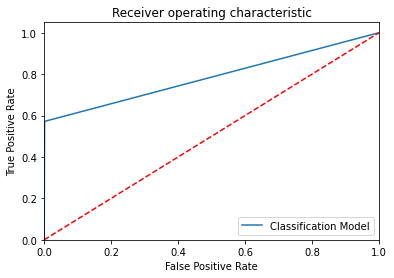

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1951   478]
 [    8 19091]]
Outcome values : 
 1951 478 8 19091
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.80      0.89      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.90      0.94     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 97.7 %
Precision : 99.6 %
Recall : 80.3 %
F1 Score : 0.889
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 90.2 %
MCC : 0.883
roc_auc_score: 0.901


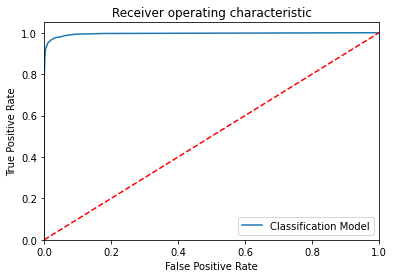

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2008   421]
 [   11 19088]]
Outcome values : 
 2008 421 11 19088
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.83      0.90      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.91      0.95     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 98.0 %
Precision : 99.5 %
Recall : 82.7 %
F1 Score : 0.903
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 91.3 %
MCC : 0.897
roc_auc_score: 0.913


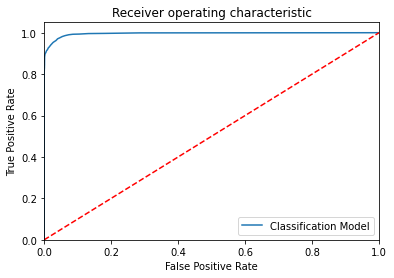

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1371  1058]
 [  368 18731]]
Outcome values : 
 1371 1058 368 18731
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.56      0.66      2429
           0       0.95      0.98      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.87      0.77      0.81     21528
weighted avg       0.93      0.93      0.93     21528

Accuracy : 93.4 %
Precision : 78.8 %
Recall : 56.4 %
F1 Score : 0.658
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 77.2 %
MCC : 0.633
roc_auc_score: 0.773


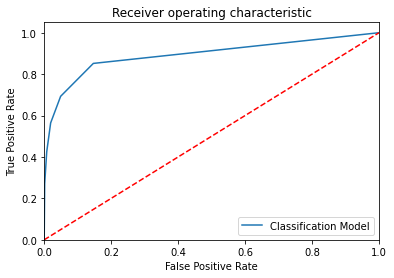

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 1922   507]
 [ 1324 17775]]
Outcome values : 
 1922 507 1324 17775
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.79      0.68      2429
           0       0.97      0.93      0.95     19099

    accuracy                           0.91     21528
   macro avg       0.78      0.86      0.81     21528
weighted avg       0.93      0.91      0.92     21528

Accuracy : 91.5 %
Precision : 59.2 %
Recall : 79.1 %
F1 Score : 0.677
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 86.1 %
MCC : 0.638
roc_auc_score: 0.861


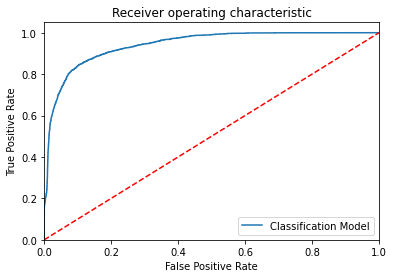

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  536  1893]
 [  121 18978]]
Outcome values : 
 536 1893 121 18978
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.22      0.35      2429
           0       0.91      0.99      0.95     19099

    accuracy                           0.91     21528
   macro avg       0.86      0.61      0.65     21528
weighted avg       0.90      0.91      0.88     21528

Accuracy : 90.6 %
Precision : 81.6 %
Recall : 22.1 %
F1 Score : 0.347
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 60.8 %
MCC : 0.394
roc_auc_score: 0.607


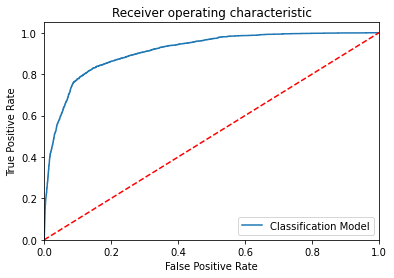

-----------------------------------------------------------------------------------------------------


In [57]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [58]:
#predict the values with DECISION TREE CLASSIFIER algorithm
y_predF=ModelET.predict(x_test)

In [59]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
62710     9   CASH_IN  209763.04    C76964121       29461.00       239224.04   
24775     8   PAYMENT    3040.73   C739808786       14286.93        11246.20   
47863     9  CASH_OUT  139400.60   C321305992       60922.00            0.00   
55110     9   PAYMENT   19879.83  C1143765158       26961.00         7081.17   
35068     8   PAYMENT    6226.43  C1940116494       20293.00        14066.57   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
62710  C1365666520       693389.83       853562.47        0               0   
24775  M2059126536            0.00            0.00        0               0   
47863   C722000586        31317.39       841958.48        0               0   
55110   M680285926            0.00            0.00        0               0   
35068  M1628700829            0.00            0.00        0               0   

       isFraud_A  isFraud_P  
62710          0          0  
24775          0          0  
47863          0          0  
55110          0          0  
35068          0          0

In [60]:
EMResults.head()

Model Name True_Positive  \
0                               LogisticRegression()           945   
1                           DecisionTreeClassifier()          1389   
2  (DecisionTreeClassifier(max_features='auto', r...          1951   
3  (ExtraTreeClassifier(random_state=486733023), ...          2008   
4                             KNeighborsClassifier()          1371   

  False_Negative False_Positive True_Negative Accuracy Precision Recall  \
0           1484            217         18882    0.921     0.813  0.389   
1           1040             22         19077    0.951     0.984  0.572   
2            478              8         19091    0.977     0.996  0.803   
3            421             11         19088     0.98     0.995  0.827   
4           1058            368         18731    0.934     0.788  0.564   

  F1 Score Specificity    MCC ROC_AUC_Score Balanced Accuracy  
0    0.526       0.989  0.529      0.688844             0.689  
1    0.723       0.999   0.73      0.785344             0.786  
2    0.889         1.0  0.883      0.901396             0.902  
3    0.903       0.999  0.897      0.913051             0.913  
4    0.658       0.981  0.633      0.772581             0.772